# Classes / Objects in Python

<b>Create a Class</b> <br />
To create a class, use the keyword class:


In [1]:
class SampleClass:
    pass

In [2]:
SampleClass

__main__.SampleClass

In [3]:
class SampleClass:
    x = 5
    y = 10
    z = x * y

In [4]:
SampleClass.x

5

In [5]:
SampleClass.z

50

# Create an object from the Class

In [6]:
sc = SampleClass()
sc.z

50

# The __init__() Function

***Use the __init__() function to assign values to object properties, or other operations that are necessary to do when the object is being created***
<br />

***Note: The __init__() function is called automatically every time the class is being used to create a new object.***

In [7]:
class Area_of_Triangle:
  def __init__(self, b, h):
    self.b = b
    self.h = h


area = Area_of_Triangle(5, 10)

area.h

10

In [16]:
a1 = Area_of_Triangle('5','10')
a1.h

'10'

In [19]:
print( f"The area of triangle ABC with height, {area.h} and base of {area.b} is {area.h*area.b}")

The area of triangle ABC with height, 10 and base of 5 is 50


In [45]:
class Circle:
    def __init__(self, r):
        self.r = r
        
    def area(self):
        print(f"Area of Circle with radius ({self.r}) = {(22/7)*float(self.r)**2} ")

    def circumference(self):
        print(f"Circumference of Circle with radius ({self.r}) = {2*(22/7)*float(self.r)} ")
        
    def diameter(self):
        print(f"Diameter of Circle with radius ({self.r}) = {2*float(self.r)} ")


In [46]:
p1 = Circle(r=7)
print(p1.area(), p1.circumference(), p1.diameter())

Area of Circle with radius (7) = 154.0 
Circumference of Circle with radius (7) = 44.0 
Diameter of Circle with radius (7) = 14.0 
None None None


In [49]:
p1.r = 21

In [50]:
p1.diameter()

Diameter of Circle with radius (21) = 42.0 


In [44]:
print(p1.area(), p1.circumference(), p1.diameter())

Area of Circle with radius (7) = 154.0 
Circumference of Circle with radius (7) = 44.0 
Diameter of Circle with radius (7) = 14.0 
None None None


<h1> Trial Question </h1>
<h3> 1-D Harmonic Oscillation </h3>

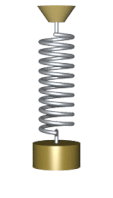

Using ***Python classes and numerical methods***, simulate the motion of a one-dimensional harmonic oscillator with a mass of 1 kg, a spring constant of 2 N/m, an initial position of 1 m, and an initial velocity of 0 m/s. 

 - Plot the position and velocity of the oscillator as a function of time for a duration of 10 seconds, using a time step of 0.01 seconds.  <br /><br />

 - Provide a brief explanation of your implementation and discuss the observed motion based on the plotted results.
 
 


<br /><br /><br />
***Key Expressions (How To)*** <br />
In this problem, you are asked to simulate the motion of a one-dimensional harmonic oscillator using the following equation of motion:

$$F = -k \times x$$

where F is the restoring force, k is the spring constant, and x is the displacement from the equilibrium position. The force acting on the mass can be related to its acceleration (a) through Newton's second law:

$$F = m * a$$

where m is the mass of the oscillator. Combining these two equations gives:

$$m * a = -k * x$$

or

$$a = -(k/m) * x$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Build A Class For The Harmonic Oscillation

In [11]:
class HarmonicOscillator:
    def __init__(self, mass, spring_constant, initial_position, initial_velocity):
        self.mass = mass
        self.spring_constant = spring_constant
        self.position = initial_position
        self.velocity = initial_velocity

    def acceleration(self):
        return -self.spring_constant * self.position / self.mass

    def update(self, dt):
        self.velocity += self.acceleration() * dt
        self.position += self.velocity * dt

class Simulation:
    def __init__(self, oscillator, time_step, total_time):
        self.oscillator = oscillator
        self.time_step = time_step
        self.total_time = total_time
        self.time = np.arange(0, total_time, time_step)
        self.positions = np.zeros_like(self.time)
        self.velocities = np.zeros_like(self.time)
        self.accelerations = np.zeros_like(self.time)  # Store acceleration data


    def run(self):
        for i, t in enumerate(self.time):
            self.positions[i] = self.oscillator.position
            self.velocities[i] = self.oscillator.velocity
            self.accelerations[i] = self.oscillator.acceleration()  # Save acceleration at each time step
            self.oscillator.update(self.time_step)



In [12]:
# Create a harmonic oscillator instance with mass=1, spring_constant=2, initial_position=1, and initial_velocity=0
oscillator = HarmonicOscillator(1, 2, 1, 0)

# Create a simulation instance with the oscillator, time_step=0.01, and total_time=10
simulation = Simulation(oscillator, 0.01, 10)

# Run the simulation
simulation.run()

# Visualization

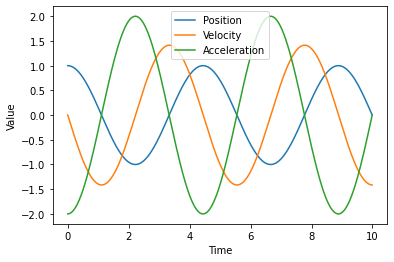

In [13]:
# Plot the results using matplotlib

plt.figure()
plt.plot(simulation.time, simulation.positions, label="Position")
plt.plot(simulation.time, simulation.velocities, label="Velocity")
plt.plot(simulation.time, simulation.accelerations, label="Acceleration")  # Plot acceleration data

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()


# Trial Question 2

A container with a volume of 1 m³ holds an ideal gas at an initial pressure of 1.5 x 10^5 Pa and a temperature of 300 K. The gas undergoes an isothermal expansion at constant temperature until its final volume is 3 m³. Calculate the final pressure and the work done by the gas during the expansion. Use the following equation for the isothermal process of an ideal gas:

$$PV = nRT$$

where $P$ is the pressure, $V$ is the volume, $n$ is the number of moles, $R$ is the gas constant, and $T$ is the temperature.

Assume that the gas constant $R$ = 8.314 $J/(mol \ K)$ and the molar mass of the gas is 28.97 $g/mol$.

Provide a Python script to perform the calculations and plot the pressure-volume curve during the expansion.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

class IdealGas:
    def __init__(self, P_initial, V_initial, T, molar_mass):
        self.R = 8.314  # Gas constant in J/(mol*K)
        self.P_initial = P_initial
        self.V_initial = V_initial
        self.T = T
        self.molar_mass = molar_mass
        self.n = (P_initial * V_initial) / (self.R * T)  # Calculate the number of moles (n)

    def final_pressure(self, V_final):
        return (self.n * self.R * self.T) / V_final

    def work_done(self, V_final):
        return self.n * self.R * self.T * np.log(V_final / self.V_initial)

    def plot_isotherm(self, V_final):
        volumes = np.linspace(self.V_initial, V_final, 100)
        pressures = self.n * self.R * self.T / volumes

        plt.figure()
        plt.plot(volumes, pressures, label="Isothermal Expansion")
        plt.xlabel("Volume (m^3)")
        plt.ylabel("Pressure (Pa)")
        plt.title("Pressure-Volume Curve for Isothermal Expansion")
        plt.legend()
        plt.show()



Final pressure: 50000.00000000001 Pa
Work done: 164791.8433002165 J


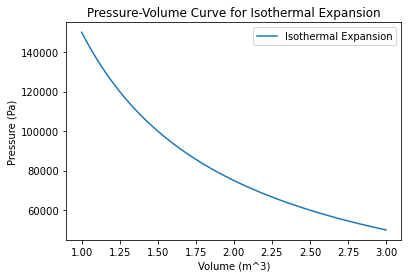

In [15]:
# Create an IdealGas instance with initial pressure, initial volume, temperature, and molar mass
gas = IdealGas(P_initial=1.5e5, V_initial=1, T=300, molar_mass=28.97e-3)

V_final = 3  # Final volume in m^3

# Calculate the final pressure and work done
P_final = gas.final_pressure(V_final)
W = gas.work_done(V_final)

# Print the results
print(f"Final pressure: {P_final} Pa")
print(f"Work done: {W} J")

# Plot the isotherm
gas.plot_isotherm(V_final)
